### 1. IMPORT LIBRARY AND DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from dataset import load_data

### 2. LOAD DATASET

In [2]:
df = load_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


### 3. PRE PROCESSING DATA

##### a. Checking missing value

In [3]:
print("Missing values in dataset:")
df.isnull().sum()

Missing values in dataset:


displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

##### b. Filling missing value with mean

In [4]:
horsepower_mean = df['horsepower'].mean()
missing_count = df['horsepower'].isnull().sum()

df['horsepower'].fillna(horsepower_mean, inplace=True)

df.isnull().sum()

displacement    0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

##### c. Reset Index

In [5]:
df = df.reset_index(drop=True)

### 4. EXPLORATORY DATA ANALYSIS

##### a. Statistical Analysis

In [6]:
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
       displacement   cylinders  horsepower       weight  acceleration  \
count    398.000000  398.000000  398.000000   398.000000    398.000000   
mean     193.425879    5.454774  104.469388  2970.424623     15.568090   
std      104.269838    1.701004   38.199187   846.841774      2.757689   
min       68.000000    3.000000   46.000000  1613.000000      8.000000   
25%      104.250000    4.000000   76.000000  2223.750000     13.825000   
50%      148.500000    4.000000   95.000000  2803.500000     15.500000   
75%      262.000000    8.000000  125.000000  3608.000000     17.175000   
max      455.000000    8.000000  230.000000  5140.000000     24.800000   

       model_year      origin         mpg  
count  398.000000  398.000000  398.000000  
mean    76.010050    1.572864   23.514573  
std      3.697627    0.802055    7.815984  
min     70.000000    1.000000    9.000000  
25%     73.000000    1.000000   17.500000  
50%     76.000000    1.000000   23.000000  
75% 

##### b. Checking Data Distribution

In [7]:
# Display first and last rows
print("First 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())

# Check data shape
print(f"\nDataset shape: {df.shape}")
print(f"Total records: {df.shape[0]}")
print(f"Total features: {df.shape[1]}")

First 5 rows:
   displacement  cylinders  horsepower  weight  acceleration  model_year  \
0         307.0          8       130.0    3504          12.0          70   
1         350.0          8       165.0    3693          11.5          70   
2         318.0          8       150.0    3436          11.0          70   
3         304.0          8       150.0    3433          12.0          70   
4         302.0          8       140.0    3449          10.5          70   

   origin   mpg  
0       1  18.0  
1       1  15.0  
2       1  18.0  
3       1  16.0  
4       1  17.0  

Last 5 rows:
     displacement  cylinders  horsepower  weight  acceleration  model_year  \
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6          82   
395         135.0          4        84.0    2295          11.6          82   
396         120.0          4        79.0    2625          18.6          82   
397         119.0

##### c. Correlation Matrix

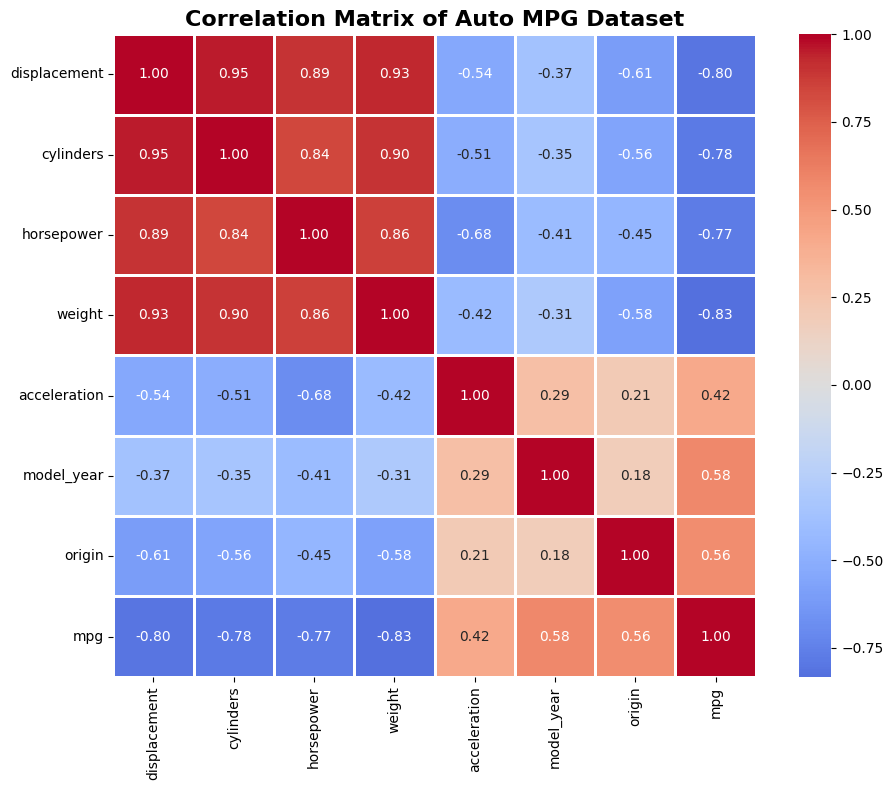


Correlation with MPG (target variable):
mpg             1.000000
model_year      0.579267
origin          0.563450
acceleration    0.420289
horsepower     -0.771437
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64


In [8]:
# Calculate correlation
correlation = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True, linewidths=1)
plt.title('Correlation Matrix of Auto MPG Dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Show detailed summary
print("\nCorrelation with MPG (target variable):")
print(correlation['mpg'].sort_values(ascending=False))

##### d. Distribution of MPG with Histogram and Boxplot

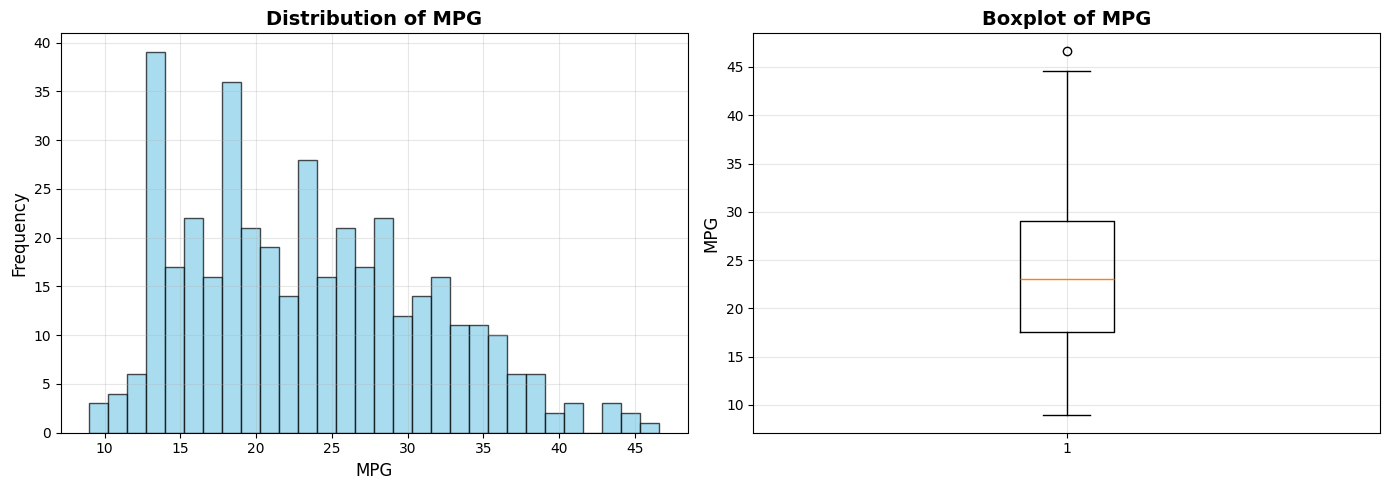


MPG Statistics:
Mean: 23.51
Median: 23.00
Std Dev: 7.82
Min: 9.00
Max: 46.60


In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['mpg'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_xlabel('MPG', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of MPG', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Boxplot
axes[1].boxplot(df['mpg'], vert=True)
axes[1].set_ylabel('MPG', fontsize=12)
axes[1].set_title('Boxplot of MPG', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nMPG Statistics:")
print(f"Mean: {df['mpg'].mean():.2f}")
print(f"Median: {df['mpg'].median():.2f}")
print(f"Std Dev: {df['mpg'].std():.2f}")
print(f"Min: {df['mpg'].min():.2f}")
print(f"Max: {df['mpg'].max():.2f}")

Interpretasi hasil visualisasi

Dari histogram didapatkan pola distribusi yang condong miring ke kanan dengan frekuensi MPG tertinggi pada angka 13 - 15 yaitu sekitar 39 mobil. Sebagian besar mobil memiliki MPG berkisar antara 10 - 35.

Dari boxplot didapatkan nilai tengah sebesar 23 dan ditemukan 1 data outlier dengan MPG sebesar 46.6.

### 5. LINEAR REGRESSION MODELLING

##### a. Preparing Features and Target

In [10]:
# Separate features (X) and target (y)
X = df.drop('mpg', axis=1)
y = df['mpg']

print("Features (X):")
print(X.columns.tolist())
print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")

Features (X):
['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']

X shape: (398, 7)
y shape: (398,)


##### b. Split data

In [11]:
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining set: {X_train.shape[0]/len(X)*100:.1f}%")
print(f"Testing set: {X_test.shape[0]/len(X)*100:.1f}%")

Training set size: 318 samples
Testing set size: 80 samples

Training set: 79.9%
Testing set: 20.1%


##### c. Training model

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model Coefficients:")
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
coefficients = coefficients.sort_values('Coefficient', key=abs, ascending=False)
print(coefficients.to_string(index=False))

print(f"\nIntercept: {model.intercept_:.4f}")

Model Coefficients:
     Feature  Coefficient
      origin     1.313313
  model_year     0.796479
   cylinders    -0.154180
acceleration     0.074889
displacement     0.013997
  horsepower    -0.011798
      weight    -0.006775

Intercept: -20.7822


##### d. Making sample prediction

In [13]:
# Predictions on train and test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"5 Sample predictions :")
comparison = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred[:5],
    'Difference': y_test.values[:5] - y_test_pred[:5]
})
print(comparison.to_string(index=False))

5 Sample predictions :
 Actual  Predicted  Difference
   33.0  32.863457    0.136543
   28.0  29.581302   -1.581302
   19.0  21.351261   -2.351261
   13.0  16.805687   -3.805687
   14.0  12.501362    1.498638


##### e. Evaluation for model

In [14]:
# For training set
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# For testing set
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nTRAINING SET:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  RMSE: {train_rmse:.4f}")

print("\nTESTING SET:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  RMSE: {test_rmse:.4f}")


TRAINING SET:
  R² Score: 0.8140
  RMSE: 3.4153

TESTING SET:
  R² Score: 0.8476
  RMSE: 2.8628


Interpretasi Hasil Evaluasi

Model dapat menjelaskan data sebanyak 84.76% variasi data dengan rata-rata prediksi salah sebesar ±2.86 MPG